In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np

In [2]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

#for model evaluation
from sklearn.metrics import roc_curve, auc 
from matplotlib import pyplot

In [3]:
df = pd.read_csv('Imputed_Data.csv')

# set the max columns to none
pd.set_option('display.max_columns', None)

df.head()

,Unnamed: 0,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,Renal failure,COPD,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2,Urine output,hematocrit,RBC,MCH,MCHC,MCV,RDW,Leucocyte,Platelets,Neutrophils,Basophils,Lymphocyte,PT,INR,NT-proBNP,Creatine kinase,Creatinine,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF,Comorbidities
0,0,1,125047,0.0,72,1,37.588179,0,0,0,1,1,0,1,1,0,68.837838,155.866667,68.333333,16.621622,36.714286,98.394737,2155.0,26.272727,2.960000,28.250000,31.520000,89.900,16.220000,7.650000,305.100,74.650000,0.400000,13.300000,10.600000,1.000000,1956.0,148.000000,1.958333,50.000000,114.636364,4.816667,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55,4.0
1,1,1,139812,0.0,75,2,30.188278,0,0,0,0,1,0,0,0,1,101.370370,140.000000,65.000000,20.851852,36.682540,96.923077,1425.0,30.780000,3.138000,31.060000,31.660000,98.200,14.260000,12.740000,246.400,80.115592,0.405685,12.232717,17.486404,1.626064,2384.0,60.600000,1.122222,20.333333,147.500000,4.450000,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55,2.0
2,2,1,109787,0.0,83,2,26.572634,0,0,0,0,1,0,0,1,0,72.318182,135.333333,61.375000,23.640000,36.453704,95.291667,2425.0,27.700000,2.620000,34.320000,31.300000,109.800,23.820000,5.480000,204.200,68.100000,0.550000,24.500000,11.275000,0.950000,4081.0,16.000000,1.871429,33.857143,149.000000,5.825000,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35,2.0
3,3,1,130587,0.0,43,2,83.264629,0,0,0,0,0,0,0,0,0,94.500000,126.400000,73.200000,21.857143,36.287037,93.846154,8760.0,36.637500,4.277500,26.062500,30.412500,85.625,17.037500,8.225000,216.375,81.800000,0.150000,14.500000,27.066667,2.666667,668.0,85.000000,0.585714,15.285714,128.250000,4.386667,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55,0.0
4,4,1,138290,0.0,75,2,31.824842,1,0,0,0,1,0,0,1,1,67.920000,156.560000,58.120000,21.360000,36.761905,99.280000,4455.0,29.933333,3.286667,30.666667,33.666667,91.000,16.266667,8.833333,251.000,80.115592,0.405685,12.232717,17.486404,1.626064,30802.0,111.666667,1.950000,43.000000,145.750000,4.783333,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55,4.0


In [4]:
df.columns

Index(['Unnamed: 0', 'group', 'ID', 'outcome', 'age', 'gendera', 'BMI',
       'hypertensive', 'atrialfibrillation', 'CHD with no MI', 'diabetes',
       'deficiencyanemias', 'depression', 'Hyperlipemia', 'Renal failure',
       'COPD', 'heart rate', 'Systolic blood pressure',
       'Diastolic blood pressure', 'Respiratory rate', 'temperature', 'SP O2',
       'Urine output', 'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW',
       'Leucocyte', 'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte',
       'PT', 'INR', 'NT-proBNP', 'Creatine kinase', 'Creatinine',
       'Urea nitrogen', 'glucose', 'Blood potassium', 'Blood sodium',
       'Blood calcium', 'Chloride', 'Anion gap', 'Magnesium ion', 'PH',
       'Bicarbonate', 'Lactic acid', 'PCO2', 'EF', 'Comorbidities'],
      dtype='object')

In [5]:
df.drop(['Unnamed: 0', 'group', 'ID', 'Comorbidities'],  axis=1, inplace=True)
df.head()

,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,Renal failure,COPD,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2,Urine output,hematocrit,RBC,MCH,MCHC,MCV,RDW,Leucocyte,Platelets,Neutrophils,Basophils,Lymphocyte,PT,INR,NT-proBNP,Creatine kinase,Creatinine,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,0.0,72,1,37.588179,0,0,0,1,1,0,1,1,0,68.837838,155.866667,68.333333,16.621622,36.714286,98.394737,2155.0,26.272727,2.960000,28.250000,31.520000,89.900,16.220000,7.650000,305.100,74.650000,0.400000,13.300000,10.600000,1.000000,1956.0,148.000000,1.958333,50.000000,114.636364,4.816667,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,0.0,75,2,30.188278,0,0,0,0,1,0,0,0,1,101.370370,140.000000,65.000000,20.851852,36.682540,96.923077,1425.0,30.780000,3.138000,31.060000,31.660000,98.200,14.260000,12.740000,246.400,80.115592,0.405685,12.232717,17.486404,1.626064,2384.0,60.600000,1.122222,20.333333,147.500000,4.450000,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,0.0,83,2,26.572634,0,0,0,0,1,0,0,1,0,72.318182,135.333333,61.375000,23.640000,36.453704,95.291667,2425.0,27.700000,2.620000,34.320000,31.300000,109.800,23.820000,5.480000,204.200,68.100000,0.550000,24.500000,11.275000,0.950000,4081.0,16.000000,1.871429,33.857143,149.000000,5.825000,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,0.0,43,2,83.264629,0,0,0,0,0,0,0,0,0,94.500000,126.400000,73.200000,21.857143,36.287037,93.846154,8760.0,36.637500,4.277500,26.062500,30.412500,85.625,17.037500,8.225000,216.375,81.800000,0.150000,14.500000,27.066667,2.666667,668.0,85.000000,0.585714,15.285714,128.250000,4.386667,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,0.0,75,2,31.824842,1,0,0,0,1,0,0,1,1,67.920000,156.560000,58.120000,21.360000,36.761905,99.280000,4455.0,29.933333,3.286667,30.666667,33.666667,91.000,16.266667,8.833333,251.000,80.115592,0.405685,12.232717,17.486404,1.626064,30802.0,111.666667,1.950000,43.000000,145.750000,4.783333,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55


In [6]:
# Create our features
X = df.drop('outcome', axis=1)
y = df['outcome']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [8]:
print("Shape of X_train:" ,X_train.shape)
print("Shape of y_train:" ,y_train.shape)
print("Shape of X_test:"  ,X_test.shape)
print("Shape of y_test:"  ,y_test.shape)

Shape of X_train: (882, 48)
Shape of y_train: (882,)
Shape of X_test: (294, 48)
Shape of y_test: (294,)


In [9]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic Regression Model

In [10]:
from sklearn.linear_model import LogisticRegression
lrm = LogisticRegression(solver='lbfgs', max_iter=200, random_state=1)
lrm.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=1)

In [11]:
# Calculated the balanced accuracy score
y_pred_lrm = lrm.predict(X_test)
balanced_accuracy_score(y_test, y_pred_lrm)

0.6272662213740459

In [12]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred_lrm)

array([[255,   7],
       [ 23,   9]], dtype=int64)

In [13]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred_lrm))

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.92      0.97      0.28      0.94      0.52      0.29       262
        1.0       0.56      0.28      0.97      0.38      0.52      0.25        32

avg / total       0.88      0.90      0.36      0.88      0.52      0.29       294



In [14]:
importances = pd.DataFrame(data={
    'Feature': X.columns,
    'Importance': lrm.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)
print(importances)

                     Feature  Importance
46                      PCO2    0.777459
41                 Anion gap    0.571984
35             Urea nitrogen    0.496871
45               Lactic acid    0.284043
40                  Chloride    0.266538
12                heart rate    0.259083
27               Neutrophils    0.224427
25                 Leucocyte    0.222969
24                       RDW    0.217927
30                        PT    0.186489
42             Magnesium ion    0.171375
15          Respiratory rate    0.165249
43                        PH    0.157296
37           Blood potassium    0.147617
4         atrialfibrillation    0.130446
13   Systolic blood pressure    0.112462
23                       MCV    0.096582
5             CHD with no MI    0.086520
33           Creatine kinase    0.076736
28                 Basophils    0.059791
29                Lymphocyte    0.056757
32                 NT-proBNP    0.024448
19                hematocrit    0.012945
0               

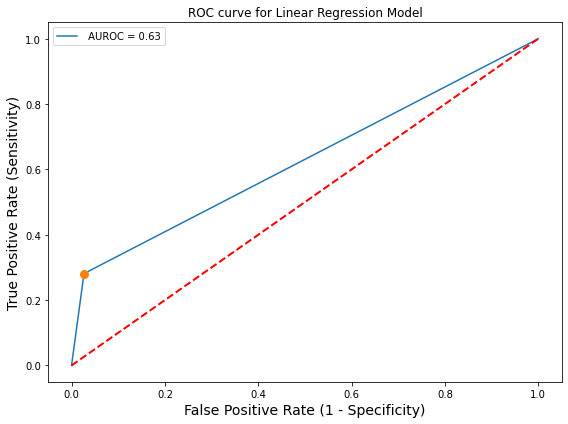

In [15]:
#roc-curve
fig, (ax2) = plt.subplots(figsize = (8,6))
fpr, tpr, thresholds_roc = roc_curve(y_test,y_pred_lrm)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for Linear Regression Model')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

# Balanced Random Forest Classifier

In [16]:
# Resample the training data with the BalancedRandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
brf = BalancedRandomForestClassifier(n_estimators=100, random_state=1)
brf.fit(X_train, y_train) 

BalancedRandomForestClassifier(random_state=1)

In [17]:
# Calculated the balanced accuracy score
y_pred_brf = brf.predict(X_test)
balanced_accuracy_score(y_test, y_pred_brf)

0.7303196564885497

In [18]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred_brf)

array([[178,  84],
       [  7,  25]], dtype=int64)

In [19]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred_brf))

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.96      0.68      0.78      0.80      0.73      0.53       262
        1.0       0.23      0.78      0.68      0.35      0.73      0.54        32

avg / total       0.88      0.69      0.77      0.75      0.73      0.53       294



In [20]:
# List the features sorted in descending order by feature importance
sorted(zip(brf.feature_importances_, X.columns), reverse=True)

[(0.0484554096197489, 'Urine output'),
 (0.04539525854492983, 'Anion gap'),
 (0.04302883958213253, 'Leucocyte'),
 (0.04192391904592612, 'Lactic acid'),
 (0.039868669701669746, 'Blood calcium'),
 (0.038168423456662826, 'Urea nitrogen'),
 (0.03740080022038453, 'Bicarbonate'),
 (0.03714396030289255, 'Lymphocyte'),
 (0.03155907863259778, 'RDW'),
 (0.028375947892549644, 'temperature'),
 (0.027197430824415506, 'Platelets'),
 (0.02685106411381188, 'Respiratory rate'),
 (0.025829493653189824, 'Diastolic blood pressure'),
 (0.025345764752643857, 'Neutrophils'),
 (0.02534226268594313, 'MCV'),
 (0.024334792692192974, 'Systolic blood pressure'),
 (0.02370446904821123, 'Creatinine'),
 (0.02364053713533079, 'Blood sodium'),
 (0.023559130450758463, 'PH'),
 (0.02353884351785429, 'PT'),
 (0.0232387961689414, 'NT-proBNP'),
 (0.022855415863711287, 'Creatine kinase'),
 (0.021162321576604824, 'Magnesium ion'),
 (0.021129637745791085, 'BMI'),
 (0.020826537950895493, 'SP O2'),
 (0.0207951958659796, 'glucose'

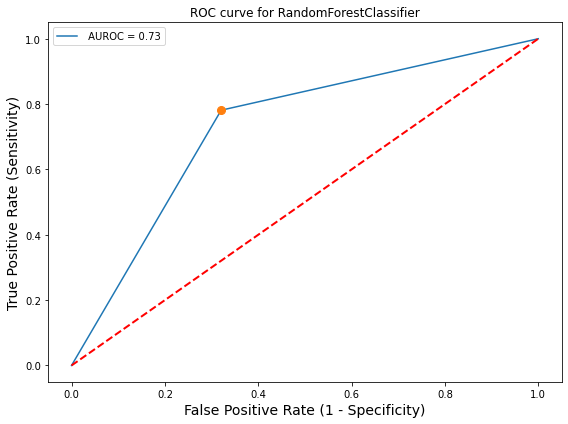

In [21]:
#roc-curve
fig, (ax2) = plt.subplots(figsize = (8,6))
fpr, tpr, thresholds_roc = roc_curve(y_test,y_pred_brf)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for RandomForestClassifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

# Easy Ensemble AdaBoost Classifier

In [22]:
# Train the EasyEnsembleClassifier
from imblearn.ensemble import EasyEnsembleClassifier
eec = EasyEnsembleClassifier(random_state=1)
eec.fit(X_train, y_train)

EasyEnsembleClassifier(random_state=1)

In [23]:
# Calculated the balanced accuracy score
y_pred_eec = eec.predict(X_test)
balanced_accuracy_score(y_test, y_pred_eec)

0.7325858778625954

In [24]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred_eec)

array([[171,  91],
       [  6,  26]], dtype=int64)

In [25]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred_eec))

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.97      0.65      0.81      0.78      0.73      0.52       262
        1.0       0.22      0.81      0.65      0.35      0.73      0.54        32

avg / total       0.89      0.67      0.80      0.73      0.73      0.52       294



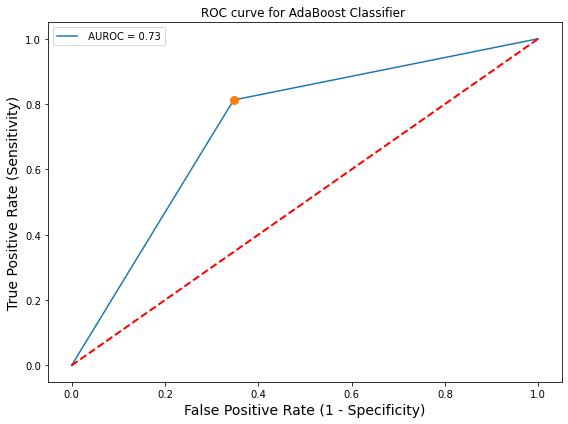

In [26]:
#roc-curve
fig, (ax2) = plt.subplots(figsize = (8,6))
fpr, tpr, thresholds_roc = roc_curve(y_test,y_pred_eec)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for AdaBoost Classifier ')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

# XGB Classifier

In [27]:
from xgboost import XGBClassifier
from sklearn import metrics
# Creating model object
xgb = XGBClassifier(n_estimator=200, random_state=1)
xgb.fit(X_train, y_train)

[22:51:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimator=200,
              n_estimators=100, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, ...)

In [28]:
# Calculated the balanced accuracy score
y_pred_xgb = xgb.predict(X_test)
balanced_accuracy_score(y_test, y_pred_xgb)

0.6604246183206106

In [29]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred_xgb)

array([[256,   6],
       [ 21,  11]], dtype=int64)

In [30]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred_xgb))

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.92      0.98      0.34      0.95      0.58      0.36       262
        1.0       0.65      0.34      0.98      0.45      0.58      0.31        32

avg / total       0.89      0.91      0.41      0.90      0.58      0.35       294



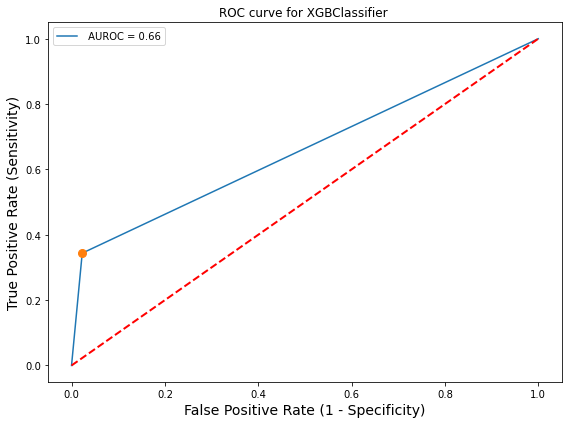

In [31]:
#roc-curve
fig, (ax2) = plt.subplots(figsize = (8,6))
fpr, tpr, thresholds_roc = roc_curve(y_test,y_pred_xgb)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for XGBClassifier ')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

# Neural Network

In [32]:
import tensorflow as tf

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 15
hidden_nodes_layer2 = 11
hidden_nodes_layer3 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                735       
                                                                 
 dense_1 (Dense)             (None, 11)                176       
                                                                 
 dense_2 (Dense)             (None, 5)                 60        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 977
Trainable params: 977
Non-trainable params: 0
_________________________________________________________________


In [33]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [34]:
# Train the model
fit_model = nn.fit(X_train, y_train,epochs=65)

Epoch 1/65
28/28 [==============================] - 1s 2ms/step - loss: 0.7325 - accuracy: 0.4898
Epoch 2/65
28/28 [==============================] - 0s 2ms/step - loss: 0.6190 - accuracy: 0.7494
Epoch 3/65
28/28 [==============================] - 0s 2ms/step - loss: 0.5346 - accuracy: 0.8333
Epoch 4/65
28/28 [==============================] - 0s 2ms/step - loss: 0.4649 - accuracy: 0.8515
Epoch 5/65
28/28 [==============================] - 0s 2ms/step - loss: 0.4113 - accuracy: 0.8605
Epoch 6/65
28/28 [==============================] - 0s 2ms/step - loss: 0.3781 - accuracy: 0.8639
Epoch 7/65
28/28 [==============================] - 0s 2ms/step - loss: 0.3540 - accuracy: 0.8673
Epoch 8/65
28/28 [==============================] - 0s 2ms/step - loss: 0.3365 - accuracy: 0.8741
Epoch 9/65
28/28 [==============================] - 0s 2ms/step - loss: 0.3216 - accuracy: 0.8776
Epoch 10/65
28/28 [==============================] - 0s 2ms/step - loss: 0.3087 - accuracy: 0.8866
Epoch 11/65
28/28 [

In [35]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test, y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

10/10 - 0s - loss: 0.4987 - accuracy: 0.8810 - 135ms/epoch - 13ms/step
Loss: 0.4987398386001587, Accuracy: 0.8809523582458496


# Support Vector Machines

In [36]:
from sklearn import svm
# Creating model object
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

In [37]:
# Calculated the balanced accuracy score
y_pred_clf = clf.predict(X_test)
balanced_accuracy_score(y_test, y_pred_clf)

0.5762166030534351

In [38]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred_clf)

array([[261,   1],
       [ 27,   5]], dtype=int64)

In [39]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred_clf))

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.91      1.00      0.16      0.95      0.39      0.17       262
        1.0       0.83      0.16      1.00      0.26      0.39      0.14        32

avg / total       0.90      0.90      0.25      0.87      0.39      0.17       294



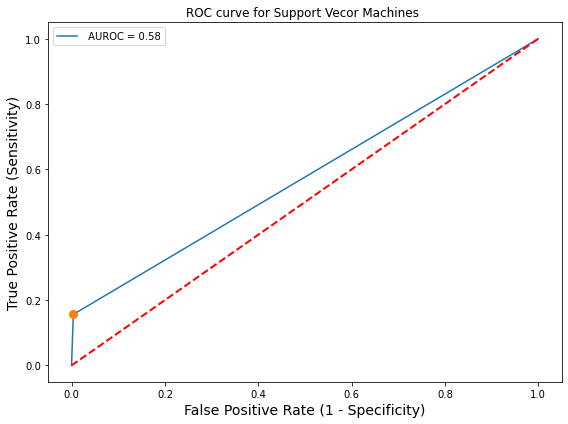

In [40]:
#roc-curve
fig, (ax2) = plt.subplots(figsize = (8,6))
fpr, tpr, thresholds_roc = roc_curve(y_test,y_pred_clf)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for Support Vecor Machines ')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

# K Nearest Neighbors

In [41]:
from sklearn.neighbors import KNeighborsClassifier

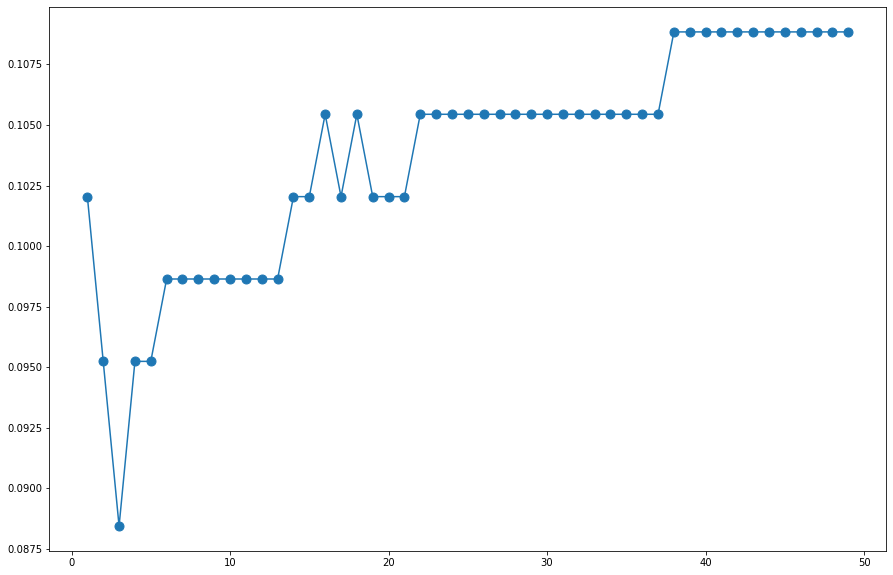

In [42]:
#determine optimal value of K
error_rate = []

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

plt.figure(figsize=(15,10))
plt.plot(range(1,50),error_rate, marker='o', markersize=9)

In [43]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [44]:
# Calculated the balanced accuracy score
y_pred_knn = knn.predict(X_test)
balanced_accuracy_score(y_test, y_pred_knn)

0.59375

In [45]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred_knn)

array([[262,   0],
       [ 26,   6]], dtype=int64)

In [46]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred_knn))

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.91      1.00      0.19      0.95      0.43      0.20       262
        1.0       1.00      0.19      1.00      0.32      0.43      0.17        32

avg / total       0.92      0.91      0.28      0.88      0.43      0.20       294



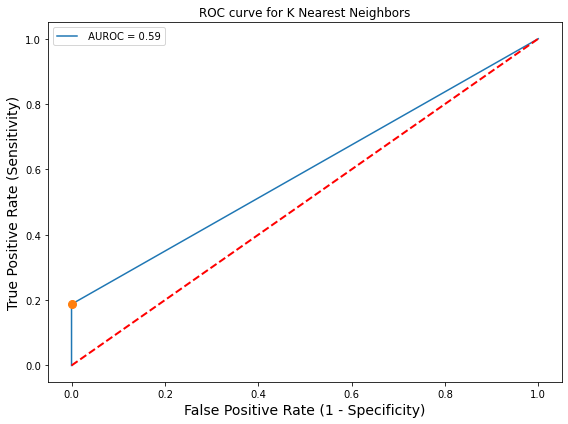

In [47]:
#roc-curve
fig, (ax2) = plt.subplots(figsize = (8,6))
fpr, tpr, thresholds_roc = roc_curve(y_test,y_pred_knn)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for K Nearest Neighbors')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()